In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random #generating negative random numbers

from mpl_toolkits.mplot3d import Axes3D # for 3D visualization

from tqdm import tqdm, trange #loading status



In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
cd

/Users/reuschenbachjosefine


In [4]:
cd ComputationalNeuroscienceUnit/pycabnn-MLI/

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI


In [5]:
import pycabnn.generate_cell_position_mli as pop

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI/pycabnn/connector.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
from neuron import h
h.load_file('test_data/params/Parameters.hoc')

Nseg for APical is 5 and Basal is 3
	36 


1.0

In [22]:
%ls

Literature/                      connection/
NeuronTutorial/                  connection_test_20210707/
Other/                           pycabnn-MLI/
Presentation/                    pycabnn-MLI-mystery.zip
Reports/                         ~$boratoryRotationProposal.docx
TonicGABAProject/                ~cell-positions.npz*


In [21]:
cd ..


/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit


In [23]:
cd connection_test_20210707

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/connection_test_20210707


In [24]:
somas=np.loadtxt("MLIcoordinates.sorted.dat")
# somas = somas['mli']
somas[:5]

array([[ 260.49691676,  240.67988039,  322.96117708],
       [1465.06295851,  597.04816666,  306.79052032],
       [ 472.20029745,  592.2483781 ,  291.51042226],
       [ 244.05444309,  228.43872702,  407.48067531],
       [ 431.83855078,  462.50694568,  413.37245933]])

In [25]:
somas[:,2].min()

233.49482242584656

In [26]:
import pycabnn.cell_population as pop

In [27]:
mlipop = pop.MLI_pop(h)

In [28]:
mlipop.load_somata(somas)

In [34]:
#DendPointAllAll, dendpt_ids_all, segs = mlipop.gen_dendrite(return_end_points=False)

## Save data to text files

In [18]:
np.savetxt("DendPointAllAll.txt", DendPointAllAll, fmt="%s")

In [19]:
np.savetxt("seg.txt", segs, fmt="%s")

In [20]:
np.savetxt("dendpt_ids_all.txt", dendpt_ids_all, fmt="%s")

In [38]:
#DendPointAllAll=np.loadtxt("DendPointAllAll.txt")


In [56]:
#seg=np.loadtxt("seg.txt")

In [56]:
cd MLI_20000/

/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI/test_data/MLI_20000


In [57]:
ls

MLIcoordinates.dat      MLIdata_20210705.npz    MLIdata_20210705_1.npz


In [29]:
dendpt_ids_all = np.loadtxt('MLI/dendpt_ids_all.txt')

In [28]:
dendpt_ids_all = dendpt_ids_all.astype(int)
seg = seg.astype(int)

In [31]:
dendpt_ids_all

array([    0,     0,     0, ..., 19884, 19884, 19884])

## Save data as npz

Text files are too big ~400MB for DentPointAllAll. Trying numpy NPZ.

In [32]:
np.savez_compressed('MLIdata_20210705_1.npz', 
                    dendpoints=DendPointAllAll,
                    segments=seg,
                    ids=dendpt_ids_all
)

In [44]:
cd pycabnn-MLI/


/Users/reuschenbachjosefine/ComputationalNeuroscienceUnit/pycabnn-MLI


In [45]:
ls

LICENSE.txt                    pycabnn/
README.md                      requirements.txt
SnipsForEPointOnSphere.ipynb   run_connector.py*
environment.yml                run_connector_MLI.py*
generate_cell_position.py*     start_ipcluster.sh
generate_cell_position_mli.py* temp_arra.npz
movie_figs/                    test_data/
notebooks/                     testsave.npz
optional-requirements.txt      unpack_db.py*


In [46]:
mlipop.load_data('testsave.npz')

In [122]:
mlipop.save_data('testsave.npz')

In [131]:
np.savetxt('test_data/MLIcoordinates.dat', somas[:100,:])

In [51]:
DendPointAllAll= mlipop["dendpoints"]
#segs_all= MLI["segments"]
#dendpt_ids_all= MLI["ids"]

TypeError: 'MLI_pop' object is not subscriptable

qpts = util.Query_point(DendPointAllAll, dendpt_ids_all, segs_all)

In [385]:
qpts.seg

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [4, 9],
       [4, 9],
       [4, 9]])

In [355]:
dendpts100 = qpts.coo[qpts.idx<100,:]
ids100 = qpts.idx[qpts.idx<100]
seg100 = qpts.seg[qpts.idx<100,:]

In [141]:
np.savez_compressed('test_data/cell_position/MLIdata.npz',
                    dendpoints=dendpts100,
                   segments=seg100,
                   ids=ids100)

In [369]:
type(seg100)

seg100[0,0]

0

In [366]:
#switching seg and ID position
for i in range(len(seg100)):
    seg100[i, 0], seg100[i,1] = seg100[i, 1], seg100[i,0]

In [361]:
a_list = ["a", "b", "c"]
a_list[0], a_list[2] = a_list[2], a_list[0]
print(a_list)


['c', 'b', 'a']


# Read the connector result

In [370]:
import pandas as pd

In [371]:
tb = pd.read_hdf('../connection_test_20210707/AAtoMLI.h5', "connection")
tb

,source,target,segment,branch,distance
0,362237,0,1,0,124.820050
1,14223,0,1,0,217.820050
2,772002,0,1,0,168.820050
3,131434,0,1,0,204.820050
4,582204,0,1,0,210.820050
...,...,...,...,...,...
983587,271047,99,4,9,72.738357
983588,774330,99,4,9,81.738357
983589,711250,99,4,9,176.738357
983590,694731,99,4,9,162.738357


In [65]:
tb[5000:5050]

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/execution.py:508: UserWarning: Error changing user exception modes.
Unrecognized mode in FormattedTB: <[5000:5001]>
Valid modes: ['Plain', 'Context', 'Verbose', 'Minimal']
  warn('Error changing %s exception modes.\n%s' %


In [400]:
min(tb.distance)


0.11079629087760168

In [410]:
tb[5:6]

,source,target,segment,branch,distance
5,312416,0,1,0,201.82005


In [447]:
#smaller1All=[]
smaller1All=np.empty((0,5), dtype=object)
#smaller1All = pd.DataFrame()
for i in range(len(tb.distance)):
    if tb.distance[i]<5:
        n=i+1
        smaller1= tb[i:n]
        #smaller1All.append(smaller1)
        smaller1All = np.append(smaller1All ,smaller1, axis=0)




In [454]:
smaller1All[:5,4]

array([4.545233529302493, 3.918316199030727, 4.918316199030727,
       3.291398868758961, 4.291398868758961], dtype=object)

In [442]:
#smaller1All=tb[3:5]
smaller1All.shape

(0, 0)

In [293]:
dist = np.sqrt((gc[362237,0]-dendpts100[0,0])**2 + 
               (gc[362237,1]-dendpts100[0,1])**2 + 
               (gc[362237,2]-dendpts100[0,2])**2)
dist

124.88786641906866

In [298]:
dendpts100[35999]

array([1395.78599977,  108.71121054,  270.73835728])

In [294]:
dist = np.sqrt((gc[14223,0]-dendpts100[0,0])**2 + 
               (gc[14223,1]-dendpts100[0,1])**2 + 
               (gc[14223,2]-dendpts100[0,2])**2)
dist

217.85802531422084

In [299]:
dist = np.sqrt((gc[611337,0]-dendpts100[35999,0])**2 + 
               (gc[611337,1]-dendpts100[35999,1])**2 + 
               (gc[611337,2]-dendpts100[35999,2])**2)
dist

140.7809503682406

In [300]:
dist = np.sqrt((gc[271047,0]-dendpts100[35999,0])**2 + 
               (gc[271047,1]-dendpts100[35999,1])**2 + 
               (gc[271047,2]-dendpts100[35999,2])**2)
dist

72.8227886924902

In [153]:
gc = np.loadtxt('test_data/cell_position/GCcoordinates.dat')

In [154]:
gc[362237,:]


array([259., 238., 198.])

In [191]:
tb.source.shape

(983592,)

In [195]:
max(tb.source)

797995

In [248]:
GCcellAll=[]
for  i in range(len(tb.source)):
    if (tb.target[i]==0) and (tb.branch[i]==0) and (tb.segment[i]==1):
        GCcell= [tb.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll.extend(GCcell)




In [251]:
GCcoor_0_0_1_All=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll)):
    GCcoor_0_0_1=(gc[GCcellAll[i]])
    GCcoor_0_0_1_All = np.vstack((GCcoor_0_0_1_All ,GCcoor_0_0_1))



In [ ]:
MLIcellAll=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==0) and (seg100[i,0]==1) and (seg100[i,1]==0):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll = np.vstack((MLIcellAll ,MLIcell))



In [288]:
GCcellAll_1_0_1=[]
for  i in range(len(tb.source)):
    if (tb.target[i]==1) and (tb.branch[i]==0) and (tb.segment[i]==1):
        GCcell= [tb.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_1_0_1.extend(GCcell)

In [289]:
GCcoor_1_0_1_All=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll)):
    GCcoor_1_0_1=(gc[GCcellAll[i]])
    GCcoor_1_0_1_All = np.vstack((GCcoor_1_0_1_All ,GCcoor_1_0_1))

In [290]:
MLIcellAll_1_0_1=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==1) and (seg100[i,0]==1) and (seg100[i,1]==0):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_1_0_1 = np.vstack((MLIcellAll_1_0_1 ,MLIcell))



In [372]:
GCcellAll_0_9_1=[]
for  i in range(len(tb.source)):
    if (tb.target[i]==1) and (tb.branch[i]==9) and (tb.segment[i]==1):
        GCcell= [tb.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_0_9_1.extend(GCcell)

In [373]:
GCcoor_0_9_1_All=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll)):
    GCcoor_0_9_1=(gc[GCcellAll[i]])
    GCcoor_0_9_1_All = np.vstack((GCcoor_0_9_1_All ,GCcoor_0_9_1))

In [377]:
MLIcellAll_0_9_1=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==0) and (seg100[i,1]==1) and (seg100[i,0]==9):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_0_9_1 = np.vstack((MLIcellAll_0_9_1 ,MLIcell))




In [378]:
MLIcellAll

array([[262.4451884552232, 240.25055474856867, 322.82004990601],
       [264.3934601541885, 239.82122910652066, 322.6789227289996],
       [266.3417318531538, 239.39190346447265, 322.5377955519892],
       [268.2900035521191, 238.9625778224246, 322.39666837497873],
       [270.2382752510844, 238.5332521803766, 322.2555411979683],
       [272.1865469500497, 238.10392653832858, 322.1144140209579],
       [274.134818649015, 237.67460089628057, 321.97328684394745],
       [276.0830903479803, 237.24527525423255, 321.832159666937],
       [278.03136204694556, 236.8159496121845, 321.69103248992656]],
      dtype=object)

100%|██████████| 360/360 [00:26<00:00, 13.47it/s]


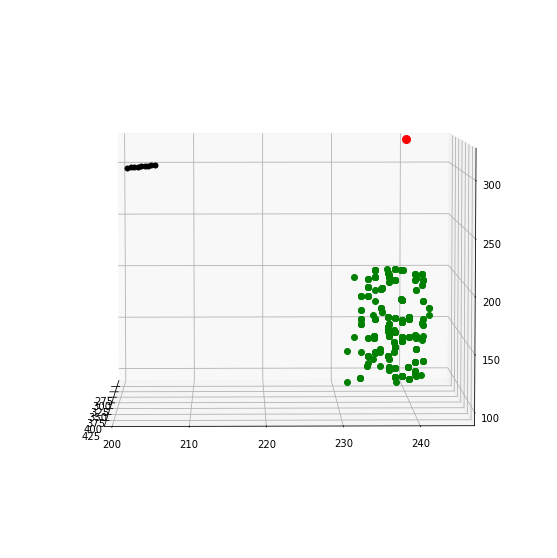

In [379]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_0_9_1_All[:,0], GCcoor_0_9_1_All[:,1], GCcoor_0_9_1_All[:,2],'og')
ax.plot(somas[0,0], somas[0,1], somas[0,2],'or', markersize=8)
ax.plot(MLIcellAll_0_9_1[:,0], MLIcellAll_0_9_1[:,1], MLIcellAll_0_9_1[:,2],'ok', markersize=5)

for ii in trange(0,360,1):
    ax.view_init(elev=5., azim=ii)
    plt.savefig("movie_figs/movie%d.png" % ii)

In [343]:
MLIcellAll

array([[262.4451884552232, 240.25055474856867, 322.82004990601],
       [264.3934601541885, 239.82122910652066, 322.6789227289996],
       [266.3417318531538, 239.39190346447265, 322.5377955519892],
       [268.2900035521191, 238.9625778224246, 322.39666837497873],
       [270.2382752510844, 238.5332521803766, 322.2555411979683],
       [272.1865469500497, 238.10392653832858, 322.1144140209579],
       [274.134818649015, 237.67460089628057, 321.97328684394745],
       [276.0830903479803, 237.24527525423255, 321.832159666937],
       [278.03136204694556, 236.8159496121845, 321.69103248992656]],
      dtype=object)

100%|██████████| 360/360 [00:30<00:00, 11.89it/s]


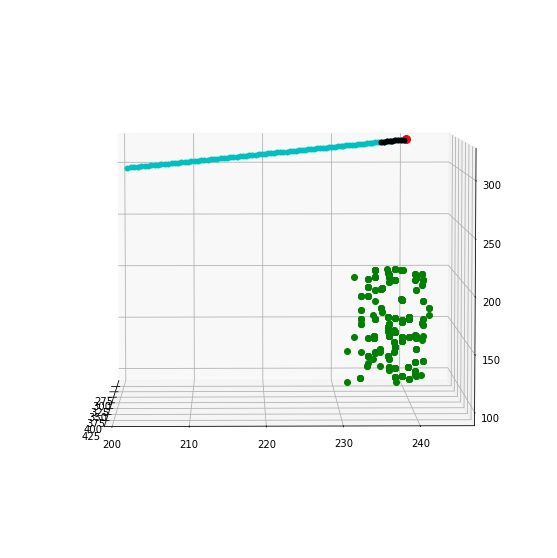

In [302]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_0_0_1_All[:,0], GCcoor_0_0_1_All[:,1], GCcoor_0_0_1_All[:,2],'og')
ax.plot(somas[0,0], somas[0,1], somas[0,2],'or', markersize=8)
ax.plot(dendpts100[:90,0], dendpts100[:90,1], dendpts100[:90,2],'oc', markersize=5)
ax.plot(MLIcellAll[:,0], MLIcellAll[:,1], MLIcellAll[:,2],'ok', markersize=5)




for ii in trange(0,360,1):
    ax.view_init(elev=5., azim=ii)
    plt.savefig("movie_figs/movie%d.png" % ii)

100%|██████████| 360/360 [00:34<00:00, 10.45it/s]


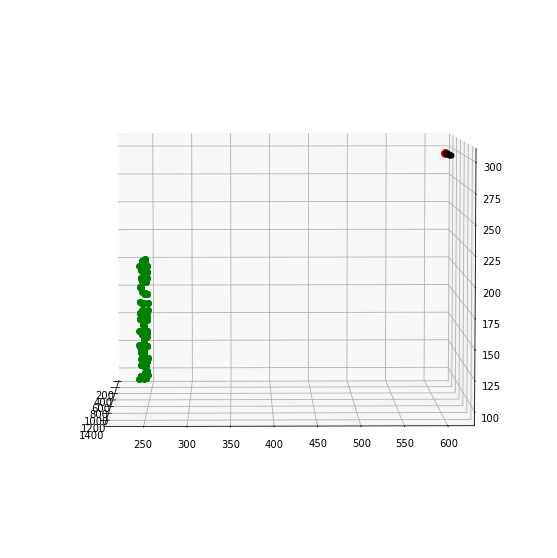

In [301]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_1_0_1_All[:,0], GCcoor_1_0_1_All[:,1], GCcoor_1_0_1_All[:,2],'og')
ax.plot(somas[1,0], somas[1,1], somas[1,2],'or', markersize=8)
#ax.plot(dendpts100[:90,0], dendpts100[:90,1], dendpts100[:90,2],'oc', markersize=5)
ax.plot(MLIcellAll_1_0_1[:,0], MLIcellAll_1_0_1[:,1], MLIcellAll_1_0_1[:,2],'ok', markersize=5)


for ii in trange(0,360,1):
    ax.view_init(elev=5., azim=ii)
    plt.savefig("movie_figs/movie%d.png" % ii)

## PF to MLI

In [2]:
pf = pd.read_hdf('../connection_test_20210707/PFtoMLI.h5', "connection")
pf

NameError: name 'pd' is not defined

In [327]:
pf.shape

(13192043, 5)

In [329]:
tb.shape

(983592, 5)

In [320]:
GCcellAll_0_9_1_PF=[]
for  i in range(len(tb.source)):
    if (pf.target[i]==1) and (pf.branch[i]==9) and (pf.segment[i]==1):
        GCcell= [pf.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_0_9_1_PF.extend(GCcell)

In [321]:
GCcoor_0_9_1_PF_All=np.empty((0,3), dtype=object)
for i in range(len(GCcellAll)):
    GCcoor_0_9_1=(gc[GCcellAll[i]])
    GCcoor_0_9_1_PF_All = np.vstack((GCcoor_0_9_1_PF_All ,GCcoor_0_9_1))

In [323]:
GCcoor_0_9_1_PF_All.shape

(310, 3)

In [324]:
MLIcellAll_0_9_1_PF=np.empty((0,3), dtype=object)

for  i in range(len(dendpts100)):
    if (ids100[i]==0) and (seg100[i,0]==1) and (seg100[i,1]==9):
        MLIcell= np.array(dendpts100[i])
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        MLIcellAll_0_9_1_PF = np.vstack((MLIcellAll_0_9_1_PF ,MLIcell))




100%|██████████| 360/360 [00:28<00:00, 12.66it/s]


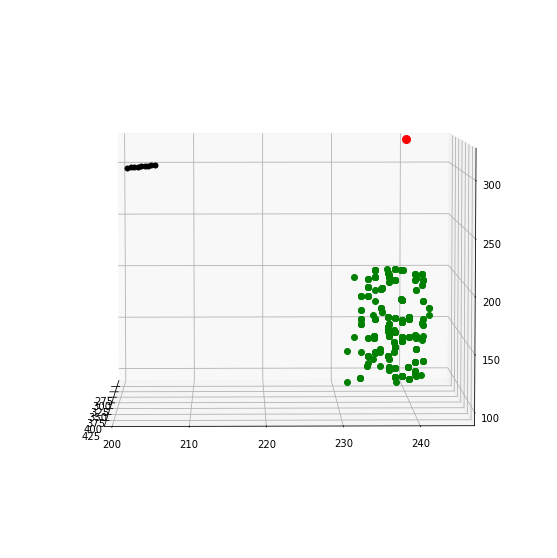

In [326]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(GCcoor_0_9_1_PF_All[:,0], GCcoor_0_9_1_PF_All[:,1], GCcoor_0_9_1_PF_All[:,2],'og')
ax.plot(somas[0,0], somas[0,1], somas[0,2],'or', markersize=8)
ax.plot(MLIcellAll_0_9_1_PF[:,0], MLIcellAll_0_9_1_PF[:,1], MLIcellAll_0_9_1_PF[:,2],'ok', markersize=5)

for ii in trange(0,360,1):
    ax.view_init(elev=5., azim=ii)
    plt.savefig("movie_figs/movie%d.png" % ii)

In [1]:
pf

NameError: name 'pf' is not defined

In [ ]:
GCcellAll_0_9_1_PF=[]
for  i in range(len(tb.source)):
    if (pf.target[i]==1) and (pf.branch[i]==9) and (pf.segment[i]==1):
        GCcell= [pf.source[i]]
        #GCcellAll=np.append(GCcellAll, GCcell, axis=0)
        #GCcellAll = np.vstack((GCcellAll,GCcell))
        GCcellAll_0_9_1_PF.extend(GCcell)